<a href="https://colab.research.google.com/github/RibeiroCSE5683/workingwithimages/blob/main/workingWithImagesAssignmentQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with videos and images

## Videos as spatio-temporal volumes

A video $\mathcal{V} = \left\{I_1, I_2, \dots, I_T\right\}$ is a sequence of images where $I_t$ is an image captured at time $t$ (i.e., video frame). We can represent each image in the video as $M\times N$ matrix $I_t$. We can also think of the video as a spatio-temporal function $I(x,y,t)$ as the one shown in Figure 1.

![video](https://github.com/RibeiroCSE5683/workingwithimages/blob/main/figs/videovolume.png?raw=1)
Figure 1: Video as spatio-temporal volume (Figure from: http://www.mikelrodriguez.com/representing-videos-using-mid-level-discriminative-patches/)




In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

### The mean, variance, and median images


#### The mean (average image)
We can calculate the *temporal average* image by averaging all image matrices in $\mathcal{V}$, i.e.:

$$
\begin{align}
	\bar{I} = \frac{1}{N}\sum_{t=1}^{T} I_t,
   % \label{avg_images}
\end{align}
$$

which is equivalent to averaging the function $I(x,y,t)$ over time, i.e.:

$$
\begin{align}
	\bar{I} = \frac{1}{N}\sum_{t=1}^{T} I(x,y,t), \,\,\,\forall (x,y).
\end{align}
$$

Figure 2 shows a sequence of images from a video of a book cover submerged in (shallow) water. The video was recorded from a top view, outside the water.

![low-energy wave distortio](https://github.com/RibeiroCSE5683/workingwithimages/blob/main/figs/openGLUnderWater.png?raw=1)
**Figure 2**:  Images from a video of a book cover submerged in shallow water. Images are distorted by low-energy waves (Figure from: Donate and Ribeiro, 2007: https://cs.fit.edu/~eribeiro/papers/DonateAndRibeiro2007.pdf)

Figure 3 shows the average image of the sequence shown in Figure 2.

![low-energy wave distortio](https://github.com/RibeiroCSE5683/workingwithimages/blob/main/figs/avgOpenGL.png?raw=1)
**Figure 2**:  Average image of the submerged book cover (Figure from: Donate and Ribeiro, 2007: https://cs.fit.edu/~eribeiro/papers/DonateAndRibeiro2007.pdf)

In [2]:
!pip install wget

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


### Task 1: Calculate the average image of a video or subset of video frames

In [3]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [4]:
import wget

wget.download('https://cs.fit.edu/~eribeiro/teaching/cse5683_new/assignments/workingwithimages/testdata/dorie.mp4')
wget.download('https://cs.fit.edu/~eribeiro/teaching/cse5683_new/assignments/workingwithimages/testdata/circuitBoard1.png')
wget.download('https://cs.fit.edu/~eribeiro/teaching/cse5683_new/assignments/workingwithimages/testdata/circuitBoard2.png')
wget.download('https://cs.fit.edu/~eribeiro/teaching/cse5683_new/assignments/workingwithimages/testdata/str2.png')





'str2 (3).png'

In [5]:
# Get a subset of video frames (i.e., images)
video_capture = cv2.VideoCapture("./dorie.mp4")

f_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
f_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
f_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

print("Number of frames: ", f_count)

frames = np.zeros((f_count,f_height, f_width, 3), np.int32)
count = 0
while video_capture.isOpened():
    ret, frame = video_capture.read()

    if not ret:
        print("Error getting frame")
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames[count] = frame

    count += 1
    if count == f_count:
        break

video_capture.release()

Number of frames:  46


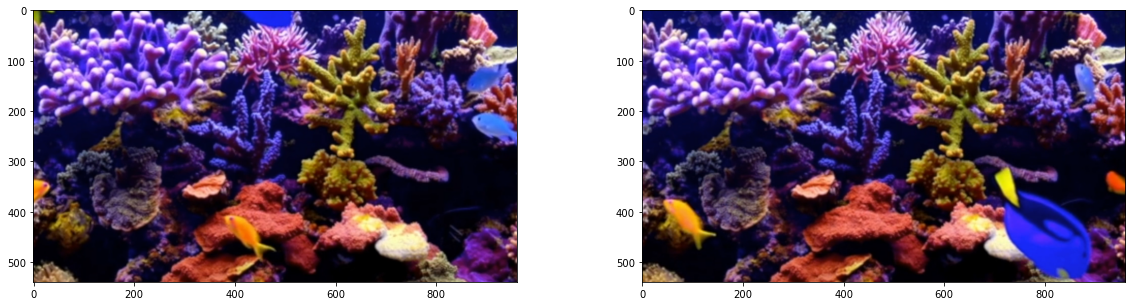

In [6]:
# Display a couple of frames
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.imshow(frames[5])
ax2.imshow(frames[40])
plt.show()

In [7]:
def calculate_mean_image(frames):
    mean_img = np.mean(frames, axis=0)
    return mean_img

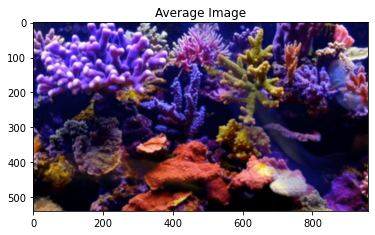

In [8]:
avg_image = calculate_mean_image(frames)

# Convert to integer prior to displaying
avg_image = avg_image.astype(np.int32)
plt.imshow(avg_image)
plt.title("Average Image")
plt.show()

#### The variance image
The *temporal variance* image is given by:

$$
\begin{align}
	S = \frac{1}{N}\sum_{t=1}^{T} \left(I_t - \bar{I}\right)^2.
\end{align}
$$

The temporal *median image* is another interesting result that we can calculate from videos. Here, we must assume that the video was recorded by a static camera (i.e., not by a moving camera). To calculate the median image, we can calculate the median of each pixel in the video along the temporal dimension.

In [9]:
def calculate_variance_image(frames):
    var_img = np.var(frames, axis=0, dtype=np.float32)
    var_img = cv2.cvtColor(var_img, cv2.COLOR_BGR2GRAY).astype(np.int32)

    return var_img

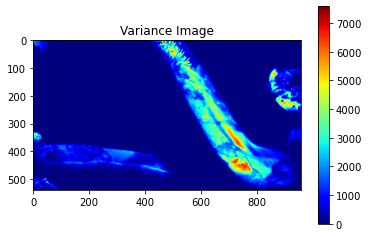

In [10]:
var_image = calculate_variance_image(frames)

plt.imshow(var_image,cmap='jet')
plt.title("Variance Image")
plt.colorbar()
plt.show()

### Partial derivatives

Given a video as a spatio-temporal volume (i.e., function), we can calculate some interesting quantities such as *partial derivatives*. For example, we can calculate the partial-derivative with respect to time, i.e.:

$$
\begin{align}
	\frac{\partial I \left(x,y,t\right)}{\partial t} \approx  I \left(x,y,t+\Delta t\right) -  I \left(x,y,t\right),
\end{align}
$$

for a small $\Delta t$, which can help us detect differences between two consecutive images (e.g., motion, defects).  

### Task 2: Use the derivative between two images to find a defect

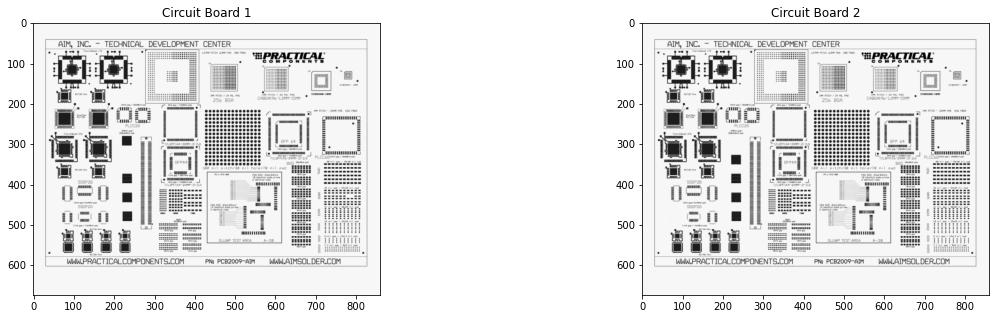

In [14]:
# Load the images in color mode
circuit1 = cv2.imread("circuitBoard1.png", cv2.IMREAD_COLOR)
circuit2 = cv2.imread("circuitBoard2.png", cv2.IMREAD_COLOR)

# Check if the images are loaded correctly
if circuit1 is None:
    print("Error: circuitBoard1.png could not be loaded.")
if circuit2 is None:
    print("Error: circuitBoard2.png could not be loaded.")

# Convert the images from BGR to RGB
circuit1 = cv2.cvtColor(circuit1, cv2.COLOR_BGR2RGB)
circuit2 = cv2.cvtColor(circuit2, cv2.COLOR_BGR2RGB)

# Display the loaded images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.imshow(circuit1)
ax1.set_title('Circuit Board 1')
ax2.imshow(circuit2)
ax2.set_title('Circuit Board 2')
plt.show()

In [15]:
def detectDifference(image1, image2):
    # Compute absolute difference
    difference = cv2.absdiff(image1, image2)

    # Convert to grayscale
    difference_gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)

    # Apply binary threshold
    _, thresholded_difference = cv2.threshold(difference_gray, 30, 255, cv2.THRESH_BINARY)

    return thresholded_difference  # Return the result


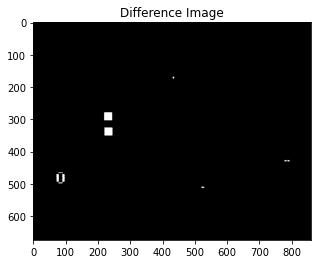

In [16]:
d = detectDifference(circuit1, circuit2)

plt.imshow(d, cmap='gray')
plt.title("Difference Image")
plt.show()

## Pixel operations

### Log enhancement
The logarithm operator can be applied to images to enhance the low-intensity pixel values while maintaining high-intensity pixel values mostly unchanged. The log operator is given by:

$$
\begin{align}
	Q = c \log \left(1 + I\right),
\end{align}
$$

where $I$ is an image. The scaling constant $c$ can be calculated so that the pixel values in $Q$ are in the range $\left[0,255\right]$. If $R$ is the maximum pixel value in image $I$, then:

$$
\begin{align}
	c = \frac{255}{\log \left(1 + R\right)}.
\end{align}
$$

It can be a good idea to apply log transformations to astronomy images and x-rays to enhance low-intensity pixel regions and details that cannot be easily distinguished by visual inspection.

### Task 4: Apply the log enhancement operator

Apply the log-enhancement operator to the following image:

In [20]:
import numpy as np

def log_enhance(image):
    # Apply log transformation
    c = 255 / np.log(1 + np.max(image))  # Scaling constant
    log_image = c * (np.log(1 + image))
    
    # Convert the result to an unsigned 8-bit integer
    log_image = np.array(log_image, dtype=np.uint8)
    
    return log_image  #  # log enhanced image

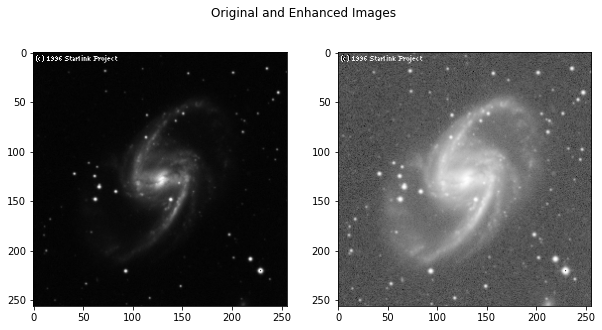

In [21]:
import numpy as np

def log_enhance(image):
    # Apply log transformation
    c = 255 / np.log(1 + np.max(image))  # Scaling constant
    log_image = c * (np.log(1 + image + 1e-5))  # Added small constant to avoid log(0)

    # Convert the result to an unsigned 8-bit integer
    log_image = np.array(log_image, dtype=np.uint8)

    return log_image  # log enhanced image

# Load the image
gif1 = cv2.imread("str2.png", cv2.IMREAD_GRAYSCALE)

if gif1 is None:
    print("Error: str2.png could not be loaded. Please check the file path.")
else:
    # Apply the log enhancement
    new_img = log_enhance(gif1)

    # Display the original and enhanced images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle('Original and Enhanced Images')
    ax1.imshow(gif1.astype(np.int32), cmap='gray')
    ax2.imshow(new_img.astype(np.int32), cmap='gray')
    plt.show()
